## EXPLORE Data Science Academy Classification Hackathon
### JUNE 2022AC

### Overview
**South Africa is a multicultural society that is characterised by its rich linguistic diversity. Language is an indispensable tool that can be used to deepen democracy and also contribute to the social, cultural, intellectual, economic and political life of the South African society.**

The country is multilingual with 11 official languages, each of which is guaranteed equal status. Most South Africans are multilingual and able to speak at least two or more of the official languages.
With such a multilingual population, it is only obvious that our systems and devices also communicate in multi-languages.



### Problem Statement

The aim of this challenge is to take in a text in which the model can predict which of the languages originated from/ belongs to among the 11 South African Languages.

#### **NAME: ODUKOYA ADEWALE DANIEL**

## 1. Library Importation 

In [1]:
import pandas as pd
import numpy as np
import re
import string

from nltk.tokenize import word_tokenize, TreebankWordTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing



from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split


from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier

# Scoring metrics
from sklearn.metrics import accuracy_score, f1_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

from sklearn.naive_bayes import MultinomialNB, BernoulliNB

from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator



import warnings
warnings.filterwarnings('ignore')




## 2. Loading data

In [2]:
df_train = pd.read_csv('train_set.csv')

In [3]:
#View data 
df_train.head()

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...


In [4]:
#Display of rows and column available in the dataset df_train
df_train.shape

(33000, 2)

## 3. Exploratory Data Analysis

#### 3.1. Checking data for null value

In [5]:
#Checking if the dataset (df_train) contains any null values
df_train.isnull().sum()

lang_id    0
text       0
dtype: int64

#### 3.2. More detail about the data

In [6]:
#This is to check through the data for data type and null available 
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33000 entries, 0 to 32999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   lang_id  33000 non-null  object
 1   text     33000 non-null  object
dtypes: object(2)
memory usage: 515.8+ KB


In [7]:
#This check through the data to display count, unique value,top and frequent text word
df_train.describe()

,lang_id,text
count,33000,33000
unique,11,29948
top,xho,ngokwesekhtjheni yomthetho ophathelene nalokhu...
freq,3000,17


#### 3.3. Histogram chart about the data

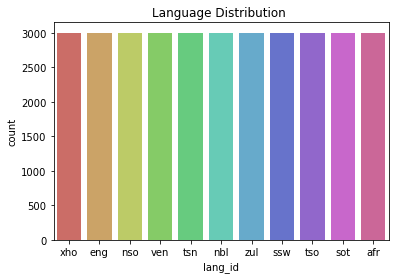

In [8]:
#Checking the the data for Language distribution
sns.countplot(x = 'lang_id', data = df_train, palette="hls")
plt.title("Language Distribution ");

#### 3.4. Pie chart about the data

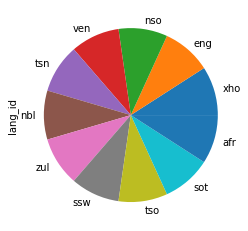

In [9]:
df_train['lang_id'].value_counts().plot(kind = 'pie')
plt.show()

In [10]:
#Counts of each language representation to substanciate the graph
df_train['lang_id'].value_counts()

xho    3000
eng    3000
nso    3000
ven    3000
tsn    3000
nbl    3000
zul    3000
ssw    3000
tso    3000
sot    3000
afr    3000
Name: lang_id, dtype: int64

##### 3.5. Observation on EDA

* The Dataset contains no null values.
* The Dataset contains two column  text and lang_id. 
* Lanugage_id column needs to be converted to numerical data type
* Text column contains word of multi-lingua.

## 4. Features Engineering 

#### Removing Noise

* removing the web-urls
* making everything lower case
* removing punctuation

#### 4.1. Removing web-url 

In [11]:
#Removing web-url from df_train dataset using regex 
pattern_url = r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+'
subs_url = r'url-web'
df_train['text'] = df_train['text'].replace(to_replace = pattern_url, value = subs_url, regex = True)

In [12]:
#Display df_train data 
df_train.head()

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...


#### 4.2. Convert all data to lowercase

In [13]:
df_train['text'] = df_train['text'].str.lower()

In [14]:
#Display df_train data 
df_train.head()

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...


#### 4.3. Removing all punctuation 

In [15]:
def remove_punctuation(text):
    return ''.join([l for l in text if l not in string.punctuation])

In [16]:
df_train['text'] = df_train['text'].apply(remove_punctuation)

In [17]:
#Display df_train data 
df_train.head()

,lang_id,text
0,xho,umgaqosiseko wenza amalungiselelo kumaziko axh...
1,xho,idha iya kuba nobulumko bokubeka umsebenzi nap...
2,eng,the province of kwazulunatal department of tra...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...


#### 4.4. Tokenization 

In [18]:
#Use wordtokenizer to seperate words
tokeniser = TreebankWordTokenizer()
df_train['tokenized'] = df_train['text'].apply(tokeniser.tokenize)

In [19]:
#Display df_train data 
df_train.head()

,lang_id,text,tokenized
0,xho,umgaqosiseko wenza amalungiselelo kumaziko axh...,"[umgaqosiseko, wenza, amalungiselelo, kumaziko..."
1,xho,idha iya kuba nobulumko bokubeka umsebenzi nap...,"[idha, iya, kuba, nobulumko, bokubeka, umseben..."
2,eng,the province of kwazulunatal department of tra...,"[the, province, of, kwazulunatal, department, ..."
3,nso,o netefatša gore o ba file dilo ka moka tše le...,"[o, netefatša, gore, o, ba, file, dilo, ka, mo..."
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...,"[khomishini, ya, ndinganyiso, ya, mbeu, yo, ew..."


#### 4.5. Removing stop words

In [20]:
def remove_stop_words(tokens):    
    return [t for t in tokens if t not in stopwords.words('english')]

In [21]:
def convert_list(df_train, col):
    """
        This function takes in a dataframe and a column with tokenized text, 
        returns a new dataframe with an additional column(tokenized), which is made up of all words in the inserted colunm
        but void of delimeters.
    """
    def operation(tok_list):
        string = ' '.join(tok_list)
        return string
    df = df_train.copy()
    df['clean_data'] = df[col].apply(operation)
    
    return df

In [22]:
# Create a new column from no_stop_word void of delimeters
new_df = convert_list(df_train, 'tokenized')
new_df.head()

,lang_id,text,tokenized,clean_data
0,xho,umgaqosiseko wenza amalungiselelo kumaziko axh...,"[umgaqosiseko, wenza, amalungiselelo, kumaziko...",umgaqosiseko wenza amalungiselelo kumaziko axh...
1,xho,idha iya kuba nobulumko bokubeka umsebenzi nap...,"[idha, iya, kuba, nobulumko, bokubeka, umseben...",idha iya kuba nobulumko bokubeka umsebenzi nap...
2,eng,the province of kwazulunatal department of tra...,"[the, province, of, kwazulunatal, department, ...",the province of kwazulunatal department of tra...
3,nso,o netefatša gore o ba file dilo ka moka tše le...,"[o, netefatša, gore, o, ba, file, dilo, ka, mo...",o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...,"[khomishini, ya, ndinganyiso, ya, mbeu, yo, ew...",khomishini ya ndinganyiso ya mbeu yo ewa maana...


In [23]:
#Extracting the needed column for further analysis
new_df_train =new_df[['lang_id', 'clean_data']]
new_df_train.head()

,lang_id,clean_data
0,xho,umgaqosiseko wenza amalungiselelo kumaziko axh...
1,xho,idha iya kuba nobulumko bokubeka umsebenzi nap...
2,eng,the province of kwazulunatal department of tra...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...


In [24]:
# Creating new dataset for df_train
new_train=new_df_train

In [25]:
new_train.head()

,lang_id,clean_data
0,xho,umgaqosiseko wenza amalungiselelo kumaziko axh...
1,xho,idha iya kuba nobulumko bokubeka umsebenzi nap...
2,eng,the province of kwazulunatal department of tra...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...


#### 4.6. Transforming Text into numbers

Data can be transformed to text through the following using CountVectorizer


In [26]:
#X=np.array(new_train['clean_data'])
#y= np.array(new_train['lang_id'])
X = new_train['clean_data'].values
y= new_train['lang_id'].values

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)
cv = CountVectorizer()
trans_train= cv.fit_transform(X_train)
trans_test = cv.transform(X_test)


## 5.1 Cleaning the datatest 

#### Data cleaning on the Testdata

The activities would be done on the dataset (test)
* Delete url
* Convert words to lowercases
* Remove punctuation
* Tokenization
* Remove stop words
* Remove newlines
* Tokenize



#### 5.1. Import test dataset

In [28]:
df_test = pd.read_csv('test_set.csv')
df_test.head()

,index,text
0,1,"Mmasepala, fa maemo a a kgethegileng a letlele..."
1,2,Uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,Tshivhumbeo tshi fana na ngano dza vhathu.
3,4,Kube inja nelikati betingevakala kutsi titsini...
4,5,Winste op buitelandse valuta.


#### 5.2. Removing all url

In [29]:
#Removing web-url from df_train dataset using regex 
pattern_url = r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+'
subs_url = r'url-web'
df_test['text'] = df_test['text'].replace(to_replace = pattern_url, value = subs_url, regex = True)

In [30]:
df_test.head()

,index,text
0,1,"Mmasepala, fa maemo a a kgethegileng a letlele..."
1,2,Uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,Tshivhumbeo tshi fana na ngano dza vhathu.
3,4,Kube inja nelikati betingevakala kutsi titsini...
4,5,Winste op buitelandse valuta.


#### 5.3. Convert data to lowercase 

In [31]:
df_test['text'] = df_test['text'].str.lower()

In [32]:
df_test.head()

,index,text
0,1,"mmasepala, fa maemo a a kgethegileng a letlele..."
1,2,uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,tshivhumbeo tshi fana na ngano dza vhathu.
3,4,kube inja nelikati betingevakala kutsi titsini...
4,5,winste op buitelandse valuta.


#### 5.4. Removing all Punctuation 

In [33]:
df_test['text'] = df_test['text'].apply(remove_punctuation)

In [34]:
df_test.head()

,index,text
0,1,mmasepala fa maemo a a kgethegileng a letlelel...
1,2,uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,tshivhumbeo tshi fana na ngano dza vhathu
3,4,kube inja nelikati betingevakala kutsi titsini...
4,5,winste op buitelandse valuta


In [35]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5682 entries, 0 to 5681
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   index   5682 non-null   int64 
 1   text    5682 non-null   object
dtypes: int64(1), object(1)
memory usage: 88.9+ KB


#### 5.5. Tokenization

In [36]:
#Use wordtokenizer to seperate words
tokeniser = TreebankWordTokenizer()
df_test['tokenized'] = df_test['text'].apply(tokeniser.tokenize)

In [37]:
df_test.head()

,index,text,tokenized
0,1,mmasepala fa maemo a a kgethegileng a letlelel...,"[mmasepala, fa, maemo, a, a, kgethegileng, a, ..."
1,2,uzakwaziswa ngokufaneleko nakungafuneka eminye...,"[uzakwaziswa, ngokufaneleko, nakungafuneka, em..."
2,3,tshivhumbeo tshi fana na ngano dza vhathu,"[tshivhumbeo, tshi, fana, na, ngano, dza, vhathu]"
3,4,kube inja nelikati betingevakala kutsi titsini...,"[kube, inja, nelikati, betingevakala, kutsi, t..."
4,5,winste op buitelandse valuta,"[winste, op, buitelandse, valuta]"


#### 5.6. Removing all stopwords

In [38]:
def remove_stop_words(tokens):    
    return [t for t in tokens if t not in stopwords.words('english')]

In [39]:
def convert_list(df_test, col):
    """
        This function takes in a dataframe and a column with tokenized text, 
        returns a new dataframe with an additional column(tokenized), which is made up of all words in the inserted colunm
        but void of delimeters.
    """
    def operation(tok_list):
        string = ' '.join(tok_list)
        return string
    df = df_test.copy()
    df['cleaned_Test_data'] = df[col].apply(operation)
    
    return df

In [40]:
new_df2 = convert_list(df_test, 'tokenized')
new_df2.head()

,index,text,tokenized,cleaned_Test_data
0,1,mmasepala fa maemo a a kgethegileng a letlelel...,"[mmasepala, fa, maemo, a, a, kgethegileng, a, ...",mmasepala fa maemo a a kgethegileng a letlelel...
1,2,uzakwaziswa ngokufaneleko nakungafuneka eminye...,"[uzakwaziswa, ngokufaneleko, nakungafuneka, em...",uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,tshivhumbeo tshi fana na ngano dza vhathu,"[tshivhumbeo, tshi, fana, na, ngano, dza, vhathu]",tshivhumbeo tshi fana na ngano dza vhathu
3,4,kube inja nelikati betingevakala kutsi titsini...,"[kube, inja, nelikati, betingevakala, kutsi, t...",kube inja nelikati betingevakala kutsi titsini...
4,5,winste op buitelandse valuta,"[winste, op, buitelandse, valuta]",winste op buitelandse valuta


#### 5.7. Extracting the cleaned dataset

In [41]:
#Extracting the needed column for further analysis
new_df_test =new_df2[['index','cleaned_Test_data']]
new_df_test.head()

,index,cleaned_Test_data
0,1,mmasepala fa maemo a a kgethegileng a letlelel...
1,2,uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,tshivhumbeo tshi fana na ngano dza vhathu
3,4,kube inja nelikati betingevakala kutsi titsini...
4,5,winste op buitelandse valuta


#### 5.8. Transform TestData

In [42]:
new_test=new_df_test

In [43]:
new_test.head()


,index,cleaned_Test_data
0,1,mmasepala fa maemo a a kgethegileng a letlelel...
1,2,uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,tshivhumbeo tshi fana na ngano dza vhathu
3,4,kube inja nelikati betingevakala kutsi titsini...
4,5,winste op buitelandse valuta


In [44]:
new_test.shape

(5682, 2)

## 6. Modelling 

In [45]:
#Transforming the data first
unseen_test = cv.transform(new_test['cleaned_Test_data'])
unseen_test

<5682x122413 sparse matrix of type '<class 'numpy.int64'>'
	with 96299 stored elements in Compressed Sparse Row format>

#### 6.1. Logistic Regression Model

In [46]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(C=30.0, class_weight='balanced', solver='newton-cg', 
                         multi_class='multinomial', n_jobs=-1, random_state=40)
clf.fit(trans_train,y_train)

y_predicted_counts = clf.predict(trans_test)




#### 6.2. Perfomance Evaluation 

In [47]:
#evaluate the performance; confusion metrix, F1 measure, accuracy
print(confusion_matrix(y_predicted_counts,y_test))
print(classification_report(y_predicted_counts,y_test))
print(accuracy_score(y_predicted_counts,y_test))

[[752   0   0   0   0   0   1   0   0   0   0]
 [  0 762   0   0   0   0   0   0   0   0   1]
 [  0   0 726   0   1   0   0   0   0   1   9]
 [  0   0   0 779   0   0   1   0   0   0   0]
 [  0   0   0   1 758   0   3   0   0   0   0]
 [  2   0   0   0   0 730   0   0   0   1   1]
 [  0   0   0   2   0   0 740   0   0   0   0]
 [  0   0   0   0   0   0   0 700   0   0   0]
 [  0   0   0   0   0   0   1   0 785   0   0]
 [  0   0   2   0   0   0   0   0   0 755   4]
 [  0   0   6   0   0   2   0   0   0   4 720]]
              precision    recall  f1-score   support

         afr       1.00      1.00      1.00       753
         eng       1.00      1.00      1.00       763
         nbl       0.99      0.99      0.99       737
         nso       1.00      1.00      1.00       780
         sot       1.00      0.99      1.00       762
         ssw       1.00      0.99      1.00       734
         tsn       0.99      1.00      0.99       742
         tso       1.00      1.00      1.00      

#### 6.3. Saving Logistic  Regression  Model

In [48]:
y_predicted = clf.predict(unseen_test)

output = pd.DataFrame({'index':new_test['index'],'lang_id': y_predicted})

output.to_csv('my_submission1.csv', index=False)
output

,index,lang_id
0,1,ssw
1,2,nbl
2,3,xho
3,4,ssw
4,5,ssw
...,...,...
5677,5678,ssw
5678,5679,nso
5679,5680,sot
5680,5681,sot


#### 6.4. RandomForest Model

In [49]:
# Instanciate a RandomForestClassification model
randomF_model = RandomForestClassifier(n_estimators=200, random_state=0)
randomF_model.fit(trans_train,y_train)
predict = randomF_model.predict(trans_test)

#### 6.5. Perfomance Evaluation 

In [50]:
#evaluate the performance; confusion metrix, F1 measure, accuracy
print(confusion_matrix(predict,y_test))
print(classification_report(predict,y_test))
print(accuracy_score(predict,y_test))

[[753   0   1   0   0   0   1   0   0   0   0]
 [  0 762   1   0   0   1   0   0   0   0   1]
 [  0   0 701   0   0   1   0   0   0   4   7]
 [  0   0   0 779   0   0   0   0   0   0   0]
 [  0   0   0   1 759   0   1   0   0   0   0]
 [  0   0   0   0   0 702   0   0   0   0   2]
 [  0   0   0   2   0   0 744   0   0   0   0]
 [  0   0   0   0   0   0   0 700   0   0   0]
 [  0   0   0   0   0   0   0   0 785   0   0]
 [  0   0   8   0   0   0   0   0   0 737   9]
 [  1   0  23   0   0  28   0   0   0  20 716]]
              precision    recall  f1-score   support

         afr       1.00      1.00      1.00       755
         eng       1.00      1.00      1.00       765
         nbl       0.96      0.98      0.97       713
         nso       1.00      1.00      1.00       779
         sot       1.00      1.00      1.00       761
         ssw       0.96      1.00      0.98       704
         tsn       1.00      1.00      1.00       746
         tso       1.00      1.00      1.00      

In [51]:
y_predicted = randomF_model.predict(unseen_test)

In [52]:
output = pd.DataFrame({'index':new_test['index'],'lang_id':y_predicted})
output.to_csv('my_submission2.csv', index=False)
output

,index,lang_id
0,1,zul
1,2,zul
2,3,ven
3,4,ssw
4,5,afr
...,...,...
5677,5678,eng
5678,5679,nso
5679,5680,sot
5680,5681,sot


#### 6.6. Naive Baye Model

In [53]:
from sklearn.naive_bayes import MultinomialNB
mlf = MultinomialNB().fit(trans_train,y_train)
pred = mlf.predict(trans_test)


#### 6.7. Perfomance Evaluation 

In [54]:
print(confusion_matrix(pred,y_test))
print(classification_report(pred,y_test))
print(accuracy_score(pred,y_test))

[[754   0   0   0   0   0   1   0   0   0   0]
 [  0 762   0   0   0   0   0   0   0   0   1]
 [  0   0 734   0   0   0   0   0   0   1   1]
 [  0   0   0 781   0   0   0   0   0   0   0]
 [  0   0   0   1 759   0   0   0   0   0   0]
 [  0   0   0   0   0 732   0   0   0   0   0]
 [  0   0   0   0   0   0 745   0   0   0   0]
 [  0   0   0   0   0   0   0 700   0   0   0]
 [  0   0   0   0   0   0   0   0 785   0   0]
 [  0   0   0   0   0   0   0   0   0 759   0]
 [  0   0   0   0   0   0   0   0   0   1 733]]
              precision    recall  f1-score   support

         afr       1.00      1.00      1.00       755
         eng       1.00      1.00      1.00       763
         nbl       1.00      1.00      1.00       736
         nso       1.00      1.00      1.00       781
         sot       1.00      1.00      1.00       760
         ssw       1.00      1.00      1.00       732
         tsn       1.00      1.00      1.00       745
         tso       1.00      1.00      1.00      

#### 6.8. Saving Baye's Model

In [55]:
y_predicted = mlf.predict(unseen_test)

output = pd.DataFrame({'index':new_test['index'],'lang_id': y_predicted})

output.to_csv('my_submission3.csv', index=False)
output

,index,lang_id
0,1,tsn
1,2,nbl
2,3,ven
3,4,ssw
4,5,afr
...,...,...
5677,5678,eng
5678,5679,nso
5679,5680,sot
5680,5681,sot


### 6.9. Conlusion

#### Amongst the 3 Model used :- 

* Logistic Regression Model
* RandomForest Classifier
* Naive Baye Model 

Note:-Naive baye Model seems to be the best performing model amongst all.